<h2 style="text-align:center;font-size:200%;;"> Data Exploration and Analysis [Pyspark] </h2>

In [1]:
filename_path = "data/purchase_data.xltx"
# filename_path = "data/purchase_data_sample.xlsx"
topN=5

In [2]:
# %%capture
# !pip install -r requirements.txt

In [3]:
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
matplotlib.rcParams["figure.dpi"] = 100
%matplotlib inline

In [4]:
%cd /app
sys.path.append('src')

/app


# 0. Data loading

In [5]:
# Import PySpark related modules
from utils.data_exploration import init_spark, spark_load_data

# initialize the spark sessions
spark = init_spark( MAX_MEMORY='4G')

# Load the main dataset into pyspark data frame 
spark_df = spark_load_data(spark, filename_path)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/25 16:51:10 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/10/25 16:52:51 WARN TaskSetManager: Stage 0 contains a task of very large size (2292 KiB). The maximum recommended task size is 1000 KiB.


There are total 199999 rows


24/10/25 16:52:55 WARN TaskSetManager: Stage 3 contains a task of very large size (2292 KiB). The maximum recommended task size is 1000 KiB.


Raw data :    Cust_ID            Name  Age                Date  Price  Quantity  \
0    48592   Tina Phillips   55 2020-01-01 00:11:40     60         4   
1    30486     Lance Colon   41 2020-01-01 00:15:47    130         4   
2     6380  Ashlee Johnson   60 2020-01-01 00:28:45    263         5   
3    27554    William Bell   52 2020-01-01 00:33:57    136         3   
4    14460   Anna Martinez   45 2020-01-01 01:32:30     23         3   

   Purch_Amt  Category  Returns  Gender  Churn  
0        240  Clothing      0.0    Male      0  
1        520  Clothing      NaN    Male      1  
2       1315      Home      0.0  Female      1  
3        408     Books      0.0    Male      0  
4         69      Home      1.0    Male      0  


In [6]:
spark_df.limit(5).toPandas()

24/10/25 16:52:56 WARN TaskSetManager: Stage 4 contains a task of very large size (2292 KiB). The maximum recommended task size is 1000 KiB.


,Cust_ID,Name,Age,Date,Price,Quantity,Purch_Amt,Category,Returns,Gender,Churn
0,48592,Tina Phillips,55,2020-01-01 00:11:40,60,4,240,Clothing,0.0,Male,0
1,30486,Lance Colon,41,2020-01-01 00:15:47,130,4,520,Clothing,NaN,Male,1
2,6380,Ashlee Johnson,60,2020-01-01 00:28:45,263,5,1315,Home,0.0,Female,1
3,27554,William Bell,52,2020-01-01 00:33:57,136,3,408,Books,0.0,Male,0
4,14460,Anna Martinez,45,2020-01-01 01:32:30,23,3,69,Home,1.0,Male,0


# 1. Data Preparation

In [7]:
from utils.data_exploration import data_preparation_pipeline

# run the data preparation pipeline
spark_df, missing_invalid_df = data_preparation_pipeline(spark, spark_df)

24/10/25 16:52:57 WARN TaskSetManager: Stage 5 contains a task of very large size (2292 KiB). The maximum recommended task size is 1000 KiB.
24/10/25 16:52:58 WARN TaskSetManager: Stage 8 contains a task of very large size (2292 KiB). The maximum recommended task size is 1000 KiB.


- 36734/199999 invalid (negative) values found!!.                 
 18.367091835459178% samples were removed from the dataset 


24/10/25 16:53:00 WARN TaskSetManager: Stage 11 contains a task of very large size (2292 KiB). The maximum recommended task size is 1000 KiB.
24/10/25 16:53:01 WARN TaskSetManager: Stage 14 contains a task of very large size (2292 KiB). The maximum recommended task size is 1000 KiB.


- 0/163265 invalid computation(s) of Purch_Amt=Price*Quantity are found!!.                 
 0.0% samples were removed from the dataset 


24/10/25 16:53:02 WARN TaskSetManager: Stage 17 contains a task of very large size (2292 KiB). The maximum recommended task size is 1000 KiB.
24/10/25 16:53:03 WARN TaskSetManager: Stage 20 contains a task of very large size (2292 KiB). The maximum recommended task size is 1000 KiB.
24/10/25 16:53:04 WARN TaskSetManager: Stage 23 contains a task of very large size (2292 KiB). The maximum recommended task size is 1000 KiB.
24/10/25 16:53:05 WARN TaskSetManager: Stage 26 contains a task of very large size (2292 KiB). The maximum recommended task size is 1000 KiB.
24/10/25 16:53:05 WARN TaskSetManager: Stage 29 contains a task of very large size (2292 KiB). The maximum recommended task size is 1000 KiB.
24/10/25 16:53:06 WARN TaskSetManager: Stage 32 contains a task of very large size (2292 KiB). The maximum recommended task size is 1000 KiB.
24/10/25 16:53:07 WARN TaskSetManager: Stage 35 contains a task of very large size (2292 KiB). The maximum recommended task size is 1000 KiB.
24/10/

In [8]:
spark_df.limit(5).toPandas()

24/10/25 16:53:12 WARN TaskSetManager: Stage 53 contains a task of very large size (2292 KiB). The maximum recommended task size is 1000 KiB.


,Cust_ID,Name,Age,Date,Price,Quantity,Purch_Amt,Category,Returns,Gender,Churn
0,48592,Tina Phillips,55,2020-01-01 00:11:40,60,4,240,Clothing,0.0,Male,0
1,30486,Lance Colon,41,2020-01-01 00:15:47,130,4,520,Clothing,0.0,Male,1
2,6380,Ashlee Johnson,60,2020-01-01 00:28:45,263,5,1315,Home,0.0,Female,1
3,27554,William Bell,52,2020-01-01 00:33:57,136,3,408,Books,0.0,Male,0
4,14460,Anna Martinez,45,2020-01-01 01:32:30,23,3,69,Home,1.0,Male,0


In [9]:
missing_invalid_df

,Cust_ID,Name,Age,Date,Price,Quantity,Purch_Amt,Category,Returns,Gender,Churn
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2.Data Analysis

In [10]:
from utils.data_exploration import data_analysis_pipeline

# run the data analysis pipeline
monthly_sales, past_sales_stats_df,current_sales_stats_df,growth_rate_dict,\
top_ranked_clients_df,worst_ranked_clients_df,\
    top_purchases_by_gender_df = data_analysis_pipeline(spark, spark_df, topN=topN, verbose=0)

24/10/25 16:53:14 WARN TaskSetManager: Stage 54 contains a task of very large size (2292 KiB). The maximum recommended task size is 1000 KiB.
24/10/25 16:53:17 WARN TaskSetManager: Stage 62 contains a task of very large size (2292 KiB). The maximum recommended task size is 1000 KiB.
24/10/25 16:53:19 WARN TaskSetManager: Stage 70 contains a task of very large size (2292 KiB). The maximum recommended task size is 1000 KiB.
24/10/25 16:53:20 WARN TaskSetManager: Stage 78 contains a task of very large size (2292 KiB). The maximum recommended task size is 1000 KiB.
24/10/25 16:53:21 WARN TaskSetManager: Stage 86 contains a task of very large size (2292 KiB). The maximum recommended task size is 1000 KiB.
24/10/25 16:53:23 WARN TaskSetManager: Stage 94 contains a task of very large size (2292 KiB). The maximum recommended task size is 1000 KiB.
24/10/25 16:53:24 WARN TaskSetManager: Stage 102 contains a task of very large size (2292 KiB). The maximum recommended task size is 1000 KiB.
24/10

#### visualizations

In [11]:
monthly_sales

,year,month,sum_Cust_ID,sum_Purch_Amt,avg_Purch_Amt,avg_Price,avg_Quantity,sum_Quantity,avg_Age,sum_Returns,sum_Churn,DateByPeriod
0,2020,1,93337613,2224391,596.03,199.00,3.01,11251,49.99,1570.0,735,2020-01-01
1,2020,2,87439599,2132153,604.35,201.74,3.00,10585,50.10,1455.0,696,2020-02-01
2,2020,3,89405188,2272470,617.02,201.52,3.05,11251,49.26,1517.0,740,2020-03-01
3,2020,4,89597816,2181254,598.59,198.57,3.01,10962,49.78,1486.0,755,2020-04-01
4,2020,5,95521031,2277181,605.63,202.05,3.00,11276,49.82,1510.0,772,2020-05-01
5,2020,6,89719010,2198794,609.76,200.39,3.04,10977,49.78,1458.0,740,2020-06-01
6,2020,7,94187197,2294211,605.49,201.03,3.00,11377,49.70,1508.0,813,2020-07-01
7,2020,8,95895575,2329672,608.75,200.89,3.04,11642,50.09,1560.0,779,2020-08-01
8,2020,9,90657939,2170052,600.62,200.19,3.00,10829,49.58,1502.0,695,2020-09-01
9,2020,10,95462458,2306382,610.15,200.64,3.03,11451,50.12,1554.0,749,2020-10-01


In [12]:
past_sales_stats_df.round(1).to_dict(orient="records")

[{'year': 2022,
  'sum_sum_Cust_ID': 829172223,
  'sum_sum_Purch_Amt': 19807827,
  'avg_avg_Price': 199.3,
  'sum_sum_Quantity': 98998,
  'avg_avg_Age': 49.7,
  'sum_sum_Returns': 13379.0,
  'sum_sum_Churn': 6631}]

In [13]:
current_sales_stats_df.round(1).to_dict(orient="records")

[{'year': 2023,
  'sum_sum_Cust_ID': 775041015,
  'sum_sum_Purch_Amt': 18593255,
  'avg_avg_Price': 200.3,
  'sum_sum_Quantity': 92669,
  'avg_avg_Age': 49.8,
  'sum_sum_Returns': 12555.0,
  'sum_sum_Churn': 6240}]

In [14]:
growth_rate_dict

{'year': 2023,
 'Cust_ID': -6.53,
 'Purch_Amt': -6.13,
 'Price': 0.49,
 'Quantity': -6.39,
 'Age': 0.28,
 'Returns': -6.16,
 'Churn': -5.9}

In [15]:
top_ranked_clients_df

,Cust_ID,Name,Age,transactions count,latest transactions,sum_Purch_Amt,avg_Age,sum_Returns,sum_Churn,percentage
0,48382,Katelyn Clark,38,15,2023-04-01 13:02:11,8411,38.0,4.0,0,0.01
1,6347,Lori Taylor,63,14,2022-08-26 16:18:07,12648,63.0,8.0,0,0.01
2,35294,Roberto Rogers,64,14,2023-08-24 07:18:33,7653,64.0,5.0,14,0.01
3,28656,Rachel Ross,31,14,2023-07-11 17:38:40,8026,31.0,3.0,14,0.01
4,19960,Patrick Gamble,76,14,2023-05-21 02:40:09,8174,76.0,6.0,0,0.01


In [16]:
top_ranked_clients_df.astype(str).to_dict(orient="records")

[{'Cust_ID': '48382',
  'Name': 'Katelyn Clark',
  'Age': '38',
  'transactions count': '15',
  'latest transactions': '2023-04-01 13:02:11',
  'sum_Purch_Amt': '8411',
  'avg_Age': '38.0',
  'sum_Returns': '4.0',
  'sum_Churn': '0',
  'percentage': '0.01'},
 {'Cust_ID': '6347',
  'Name': 'Lori Taylor',
  'Age': '63',
  'transactions count': '14',
  'latest transactions': '2022-08-26 16:18:07',
  'sum_Purch_Amt': '12648',
  'avg_Age': '63.0',
  'sum_Returns': '8.0',
  'sum_Churn': '0',
  'percentage': '0.01'},
 {'Cust_ID': '35294',
  'Name': 'Roberto Rogers',
  'Age': '64',
  'transactions count': '14',
  'latest transactions': '2023-08-24 07:18:33',
  'sum_Purch_Amt': '7653',
  'avg_Age': '64.0',
  'sum_Returns': '5.0',
  'sum_Churn': '14',
  'percentage': '0.01'},
 {'Cust_ID': '28656',
  'Name': 'Rachel Ross',
  'Age': '31',
  'transactions count': '14',
  'latest transactions': '2023-07-11 17:38:40',
  'sum_Purch_Amt': '8026',
  'avg_Age': '31.0',
  'sum_Returns': '3.0',
  'sum_Chur

In [17]:
worst_ranked_clients_df.astype(str).to_dict(orient="records")

[{'Cust_ID': '32331',
  'Name': 'Sean Snyder',
  'Age': '47',
  'transactions count': '1',
  'latest transactions': '2023-02-22 10:09:00',
  'sum_Purch_Amt': '21',
  'avg_Age': '47.0',
  'sum_Returns': '0.0',
  'sum_Churn': '1',
  'percentage': '0.0'},
 {'Cust_ID': '6584',
  'Name': 'Cathy Benjamin',
  'Age': '55',
  'transactions count': '1',
  'latest transactions': '2023-05-15 19:21:16',
  'sum_Purch_Amt': '155',
  'avg_Age': '55.0',
  'sum_Returns': '0.0',
  'sum_Churn': '0',
  'percentage': '0.0'},
 {'Cust_ID': '37579',
  'Name': 'Sarah Henderson',
  'Age': '50',
  'transactions count': '1',
  'latest transactions': '2023-06-23 18:54:30',
  'sum_Purch_Amt': '868',
  'avg_Age': '50.0',
  'sum_Returns': '0.0',
  'sum_Churn': '0',
  'percentage': '0.0'},
 {'Cust_ID': '34634',
  'Name': 'Kelly Ortiz',
  'Age': '45',
  'transactions count': '1',
  'latest transactions': '2022-12-18 12:08:49',
  'sum_Purch_Amt': '918',
  'avg_Age': '45.0',
  'sum_Returns': '0.0',
  'sum_Churn': '0',
  '

In [18]:
top_purchases_by_gender_df.astype(str).to_dict(orient="records")

[{'Category': 'Books',
  'Female': '20143',
  'Male': '20516',
  'total': '40659',
  'percentage': '24.9',
  'MalePercentage': '50.46',
  'FemalePercentage': '49.54'},
 {'Category': 'Clothing',
  'Female': '20242',
  'Male': '20563',
  'total': '40805',
  'percentage': '24.99',
  'MalePercentage': '50.39',
  'FemalePercentage': '49.61'},
 {'Category': 'Electronics',
  'Female': '20479',
  'Male': '20473',
  'total': '40952',
  'percentage': '25.08',
  'MalePercentage': '49.99',
  'FemalePercentage': '50.01'},
 {'Category': 'Home',
  'Female': '20235',
  'Male': '20614',
  'total': '40849',
  'percentage': '25.02',
  'MalePercentage': '50.46',
  'FemalePercentage': '49.54'}]

# 3. Data Modeling

In [19]:
from utils.data_exploration import data_modeling_pipeline
data_modeling_pipeline()

{}

# 4. Model Deployment

In [20]:
from utils.data_exploration import model_deployment_pipeline
model_deployment_pipeline()

{}

# DEV

In [21]:
# Import other modules not related to PySpark
import os
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats

matplotlib.rcParams["figure.dpi"] = 100
InteractiveShell.ast_node_interpurchase = "all" 
%matplotlib inline

sys.path.append('src')


In [22]:
# Import PySpark related modules
from utils.data_exploration import init_spark

spark = init_spark( MAX_MEMORY='4G')

In [23]:
# filename_path = "data/purchase_data.xltx"
filename_path = "data/purchase_data_sample.xlsx"

# Load the main data set into pyspark data frame 
df = pd.read_excel(filename_path)
spark_df = spark.createDataFrame(df)
print("Data frame type: " + str(type(spark_df)))

Data frame type: <class 'pyspark.sql.dataframe.DataFrame'>


In [24]:
# filename_path = "data/purchase_data_sample.xlsx"

# # save sample data 
# save_sample_data(df, filename_path, nrows=100)


In [25]:
print("Data frame stats (string and numeric columns only):")
spark_df.describe().toPandas()
print(f"There are total {spark_df.count()} row, Lets show 5 rows:")
spark_df.limit(5).toPandas()

Data frame stats (string and numeric columns only):


24/10/25 16:53:50 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


There are total 100 row, Lets show 5 rows:


,Cust_ID,Name,Age,Date,Price,Quantity,Purch_Amt,Category,Returns,Gender,Churn
0,17011,Zachary Roberts,29,2023-01-15 00:44:35,181,4,724,Clothing,0.0,Female,0
1,3176,Cathy Martinez,67,2021-06-27 22:22:58,135,2,270,Clothing,NaN,Female,1
2,17378,Brenda Harris,45,2022-02-11 07:08:28,322,3,966,Home,NaN,Male,0
3,16890,Amy Bailey,59,2022-01-19 04:57:55,-86,1,-86,Electronics,1.0,Female,0
4,8010,Justin Parks,65,2022-07-26 21:57:45,38,3,114,Home,0.0,Male,1


### 2.1 Schema  & datatypes
   *The data columns format (bigint, timestamp, double, string) and columns made of signle values not arrays/list.*

In [26]:
spark_df=spark_df.orderBy("Date")

In [27]:
print("Data Columns overview")
spark_df.printSchema()
pd.DataFrame(spark_df.dtypes, columns = ["Column Name","Data type"]).set_index(["Column Name"]).T

Data Columns overview
root
 |-- Cust_ID: long (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: long (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Price: long (nullable = true)
 |-- Quantity: long (nullable = true)
 |-- Purch_Amt: long (nullable = true)
 |-- Category: string (nullable = true)
 |-- Returns: double (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Churn: long (nullable = true)



Column Name,Cust_ID,Name,Age,Date,Price,Quantity,Purch_Amt,Category,Returns,Gender,Churn
Data type,bigint,string,bigint,timestamp,bigint,bigint,bigint,string,double,string,bigint


In [28]:
from utils.data_exploration import categorize_columns

# categorise the different columns
string_columns,numeric_columns,array_columns, timestamp_columns,unkown_columns =categorize_columns(spark_df)

 timestamp_columns [size= 1] = ['Date']
 string_columns [size= 3] = ['Name', 'Category', 'Gender']
 numeric_columns [size= 7] = ['Cust_ID', 'Age', 'Price', 'Quantity', 'Purch_Amt', 'Returns', 'Churn']
 array_columns [size= 0] = []
 unkown_columns [size= 0] = []


In [29]:
from utils.data_exploration import count_missing_invalid_values

# count the missing values
count_missing_invalid_values(spark_df)


,Cust_ID,Name,Age,Date,Price,Quantity,Purch_Amt,Category,Returns,Gender,Churn
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0
percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0


###  3.1 replace missing  values

- replace the 18% missingvalues of `Returns` by zero

In [30]:
#Replace 0 for null on only population column 
spark_df=spark_df.na.fill(value=0,subset=["Returns"])

# count the missing values
count_missing_values(spark_df)

NameError: name 'count_missing_values' is not defined

In [ ]:
from utils.data_exploration import plot_columns, generate_explode


In [ ]:
monthly_spark_df.columns

In [ ]:
#  plot the purchase amount history
plot_columns(monthly_spark_df, 
             x_column="DateByMonth", 
             y_columns=["sum_Purch_Amt", "sum_Quantity", "avg_Purch_Amt", "avg_Quantity","avg_Price"], 
             subplot=True)

In [ ]:
x_column="DateByMonth"
y_columns=["avg_Price","avg_Quantity", "sum_Quantity"]
#  plot the purchase history
plot_columns(monthly_spark_df, 
             x_column=x_column, 
             y_columns=y_columns,
             subplot=True)

###  3.2 remove the unvalid value (negative price, quantity, others)
- remove the 18% negative quantities  

In [ ]:
nb_unvalid_values = spark_df.select("*")\
        .where((col("Price")<0) | \
               (col("Quantity")<0) | \
               (col("Purch_Amt")<0) | \
               (col("Returns")<0) | \
               (col("Churn")<0)  ).count() 
total_nb_samples = spark_df.count()

if nb_unvalid_values>=0:
    print(f"- {nb_unvalid_values}/{total_nb_samples} unvalid (negative) values are removed from the database ")  
    spark_df = spark_df.select("*")\
                        .where((col("Price")>=0) & \
                               (col("Quantity")>=0) & \
                               (col("Purch_Amt")>=0) & \
                               (col("Returns")>=0) & \
                               (col("Churn")>=0)  )


###  3.3 remove the unvalid unvalid computation(s) of Purch_Amt=Price*Quantity
- remove the 0% unvalid computation(s)

In [ ]:
nb_unvalid_Purch_Amt_values = spark_df.select("*")\
        .where((col("Price")*col("Quantity")!=col("Purch_Amt")) ).count()
if nb_unvalid_Purch_Amt_values>=0:
    print(f"- {nb_unvalid_values}/{total_nb_samples} unvalid computation(s) of Purch_Amt=Price*Quantity. The sample will be removed ")  
    spark_df = spark_df.select("*")\
                        .where((col("Price")*col("Quantity")==col("Purch_Amt")) )

In [ ]:
spark_df.limit(5).toPandas()

In [ ]:
ranked_product_clients_df = spark_df.select(spark_df.Category, spark_df.Cust_ID) \
    .distinct() \
    .groupBy(spark_df.Category) \
    .count() \
    .orderBy("count", ascending=False)

# Top 5 purchase types
highest_product_clients_df = ranked_product_clients_df.limit(5).toPandas()
# Rename column name : "count" --> Clients count
highest_product_clients_df.rename(columns = {"count":"Clients count"}, inplace = True)
# Caculate the total users, we will this result to compute percentage later
total_categories_clients = ranked_product_clients_df.groupBy().sum().collect()[0][0]

In [ ]:
ranked_product_clients_df.collect()[:5]

In [ ]:
highest_product_clients_df_renamed = highest_product_clients_df
# Compute the percentage of top 5 purchase type / total users
highest_product_clients_df_renamed["percentage"] = highest_product_clients_df["Clients count"] \
    / total_categories_clients * 100

# We assign the rest of users belong to another specific group that we call "others"
others = {"Category": "others", 
          "Clients count": total_categories_clients - np.sum(highest_product_clients_df_renamed["Clients count"]),
          "percentage": 100 - np.sum(highest_product_clients_df_renamed["percentage"])
}

highest_product_clients_df_renamed = pd.concat([highest_product_clients_df_renamed, pd.DataFrame(others, index=[0])], ignore_index=True)
print("Top 5 categories that have the most users purchased:")
highest_product_clients_df_renamed

In [ ]:
highest_product_clients_df_renamed["Clients count"]

In [ ]:
# fig = plt.figure(figsize=(19.20,10.80))
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(0.35))

plot0 =   axs[0].bar(x=highest_product_clients_df_renamed["Category"]
                     , height=highest_product_clients_df_renamed["Clients count"])
title0 =  axs[0].set_title("Clients count", fontsize = "small")
xlabel0 = axs[0].set_xlabel("Category", fontsize = "small")
ylabel0 = axs[0].set_ylabel("Clients count", fontsize = "small")
xsticks_label = axs[0].set_xticklabels(highest_product_clients_df_renamed["Category"] 
                                       ,rotation = "vertical", fontsize="small")
nb_categories=len(np.unique(highest_product_clients_df_renamed["Category"]))
explode = generate_explode(nb_categories)
# title1 = axs[1].set_title("User ratio", fontsize = "small")
plot1 = axs[1].pie(
      x=highest_product_clients_df_renamed["percentage"]
    , labels=highest_product_clients_df_renamed["Category"]
    , autopct="%1.1f%%", shadow=True, startangle=90 , explode=explode
    , radius=1.5
)

text = fig.text(0.5, 1.02, 
                "Top 5 categories having the most users", 
                ha="center", 
                va="top", 
                transform=fig.transFigure)
# fig.savefig('output', format='svg', dpi=1200)
plt.show()

The data shows that all categories have almost same number of client.

In [ ]:
# Let quick overview purchases by gender
# we have something like this
purchases_by_gender = spark_df.groupBy("Category", "Gender").count().toPandas() 
purchases_by_gender[:5]

We want reshape the table above to flatten the gender column so that we can visualize on it. I draw a simple draft as follow 
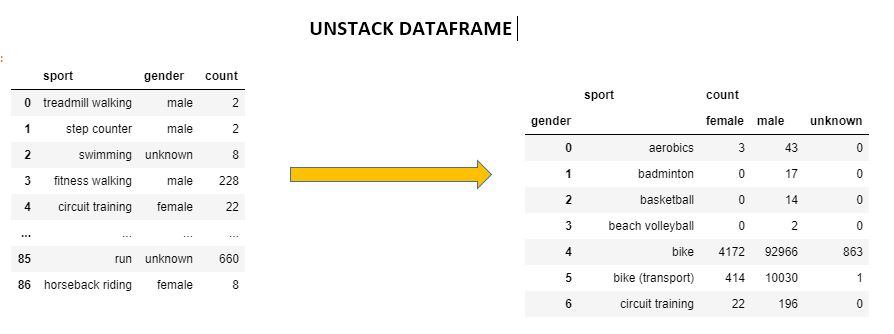

To reshape the table like this in Pyspark, we use 
```python
spark_df.unstack()
```

In [ ]:
total_purchases = ranked_product_clients_df.count()
print(f"There are total: {total_purchases} purchases and here is the chart for purchases based on gender:")
# Add the infor of purchases based on gender
purchases_by_gender = spark_df.groupBy("Category", "Gender").count().toPandas()
nb_categories=len(np.unique(purchases_by_gender["Category"]))

# Visualize
fig = plt.figure(figsize=(25, nb_categories))
grid_size = (1,1);
ax = plt.subplot2grid(grid_size, (0,0), colspan=1, rowspan=1)
plot = purchases_by_gender.groupby(["Category", "Gender"]).agg(np.mean).groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind="barh", stacked=True, width=1  ## APPLY UNSTACK TO RESHAPE DATA
                , edgecolor="black", ax=ax, title="List of all purchases by gender")
ylabel = plt.ylabel("Category (Purchase)");
xlabel = plt.xlabel("Participation percentage by gender");
legend = plt.legend(
    sorted(purchases_by_gender["Gender"].unique()), loc="center left", bbox_to_anchor=(1.0, 0.5)
)
param_update = plt.rcParams.update({"font.size": 16});
ax = plt.gca()
formatter = ax.xaxis.set_major_formatter(mtick.PercentFormatter());
a = fig.tight_layout()
plt.show()

It seems that there **no domminent** gender across all shoing categories

In [ ]:
purchases_by_gender_df = purchases_by_gender.pivot_table(
    index="Category", columns="Gender", values="count", fill_value=0) \
    .reset_index().rename_axis(None, axis=1)

purchases_by_gender_df["total"] = purchases_by_gender_df["Male"] \
        + purchases_by_gender_df["Female"] 
purchases_by_gender_df["percentage"] = purchases_by_gender_df["total"] \
    / np.sum(purchases_by_gender_df["total"]) * 100
top_purchases_by_gender_df = purchases_by_gender_df.sort_values(
    by="percentage", ascending=False
).head(5)

others = {"Category" : "others"}
for column in ["Female", "Male", "total", "percentage"]:
    value = np.sum(purchases_by_gender_df[column]) - np.sum(top_purchases_by_gender_df[column])
    others.update({column: value})
# top_purchases_by_gender_df = top_purchases_by_gender_df.append(others, ignore_index=True)
top_purchases_by_gender_df = pd.concat([top_purchases_by_gender_df, pd.DataFrame(others, index=[0])], ignore_index=True)

top_purchases_by_gender_df = top_purchases_by_gender_df.sort_values(
    by="percentage", ascending=False
)
top_purchases_by_gender_df


In [ ]:

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(0.35))

plot0 = axs[0].bar(x=top_purchases_by_gender_df["Category"]
                   , height=top_purchases_by_gender_df["total"])
title0 = axs[0].set_title("Purchase count", fontsize="small")
xlabel0 = axs[0].set_xlabel("Category", fontsize="small")
ylabel0 = axs[0].set_ylabel("Purchase count (times)", fontsize="small")
xsticks_label = axs[0].set_xticklabels(top_purchases_by_gender_df["Category"]
                                       , rotation="vertical", fontsize="small")
explode =  generate_explode(nb_categories)
title1 = axs[1].set_title("Purchase ratio", fontsize = "small")
plot1 = axs[1].pie(
    x=top_purchases_by_gender_df["percentage"]
    , labels=top_purchases_by_gender_df["Category"]
    , autopct="%1.1f%%", shadow=True, radius=1#, explode=explode
)

text = fig.text(0.5, 1.02, "Top 5 product categories that were most purchased"
                , ha="center", va="top", transform=fig.transFigure)

Similarly, it seems all product categories are purchased equally 

In [ ]:
spark_df.columns

In [ ]:

product_spdf = spark_df \
    .select(spark_df.Cust_ID, spark_df.Gender, spark_df.Category) \
    .groupBy(spark_df.Cust_ID, spark_df.Gender) \
    .count().orderBy("count", ascending = False)  

# for nb_products in 
min_number_of_categories = 1
count_nb_purchased_prouct={}
user_more_categories_df = product_spdf \
                    .filter(product_spdf["count"] == min_number_of_categories) \
                    .orderBy("count", ascending = False) \
                    .toPandas()
nb__purchased_prouct=user_more_categories_df["count"].sum()
count_nb_purchased_prouct.update({f"{min_number_of_categories}":nb__purchased_prouct})
user_more_categories_df.rename(columns = {"count":"shopping categories count"}, inplace = True)
user_more_categories_df.describe().astype(int).T
user_more_categories_df

In [ ]:
product_spdf.show()

In [ ]:
from pyspark.sql.window import Window
spark_df.withColumn("unique", 
                    (f.count("Cust_ID")\
                     .over(Window.partitionBy("Cust_ID")) == 1)\
                    .cast('integer'))\
.orderBy("unique").show()

In [ ]:
product_spdf.show()

*Based on the summary, there are 35200 clients purchased more than 1 product category. Among them in average a person bought about 2 product categories and there is some person playing up to 6 different product categories!* <br />
Now we look at the statistic by gender in box plot:

In [ ]:
plot = user_more_categories_df.boxplot(column="shopping categories count", 
                                       by="Gender", fontsize="small", figsize=(6,7))

*The boxplot showed the similar distribution by gender wwithout clear outliers*

### Distribution of records count per purchase

*For a more detailed observation, we break down the record count per purchase into each individual sport. <br />Based on the distribution, the maximum records per purchase is 500, but not all purchases and sport types reach that number.*

In [ ]:
print("\nPlot of purchased products category distribution by age:")
plot_size_x, plot_size_y = 5, 5
list_categories = spark_df.select("Category").distinct().toPandas()["Category"]
nb_rows = len(list_categories)//4 + (1 if len(list_categories)%4>0 else 0 )
figsize_x, figsize_y = plot_size_x * 4 + 3, plot_size_y * nb_rows + 1
figsize=(figsize_x, figsize_y)
fig = plt.figure(figsize=figsize) #
grid_size = (nb_rows,4)
ax = plt.subplot2grid(grid_size, (0,0), colspan=1, rowspan=1)
#fig, ax = plt.subplots()
Cust_Category_dist = spark_df.select("Age", "Category").toPandas().hist(
                                column="Age", by="Category", 
                                bins=10, sharex = False, grid=True, ax = ax,
                                layout = grid_size, figsize=figsize
                                )
a = fig.tight_layout()
title = fig.text(0.5, 1, "Distribution of purchased products category per age", ha="center" 
         , fontsize="large", transform=fig.transFigure);
ylabel = fig.text(0.01, 0.5, "Frequency (count)", va="center", rotation="vertical");

In [ ]:
nb_purchases_threshold = 5
# Filter spark_df with at least 10 records (as we are assumming if any user_id with less then 10 record would not be meaningful)
qualified_df = spark_df \
    .select(spark_df.Category, spark_df.Cust_ID, spark_df.Gender) \
    .groupBy(spark_df.Category, spark_df.Cust_ID, spark_df.Gender) \
    .count()
qualified_df = qualified_df.filter(qualified_df["count"] >= nb_purchases_threshold) \
    .orderBy("count", ascending = False)

In [ ]:
print(f"Number of users having more than {nb_purchases_threshold} purchases:")
qualified_pd_df = qualified_df.select("Cust_ID", "Gender").distinct() \
    .groupBy(qualified_df.Gender).count().toPandas()
qualified_pd_df.rename(columns={"count": "Clients count"}, inplace=True)
qualified_pd_df
qualified_clients_count = np.sum(qualified_pd_df["Clients count"])
total_clients_count = spark_df.select("Cust_ID").distinct().count()
qualified_percentage = round((qualified_clients_count / total_clients_count),2) * 100
print(f"\nSo there is {qualified_clients_count} / {total_clients_count} of users qualifying the {nb_purchases_threshold} historical records criteria, which is {qualified_percentage:.2f}%" \
     )

In [ ]:
spark_df0=spark_df

In [ ]:
spark_df=spark_df0

In [ ]:
#  Helper function to calculate statistic(s) of the column name from a tuple x of (sport, records list of the column)
#, the stats to calculate is also given as an input
def calculate_stats(x,column_name, stat_list):
    sport, records_list = x
    stat_dict = {"Category": sport}
    if "min" in stat_list:
        min_stat = min(records_list)
        stat_dict.update({"min " + column_name : min_stat})
    if "max" in stat_list:
        max_stat = max(records_list)
        stat_dict.update({"max " + column_name: max_stat})
    if "mean" in stat_list:
        average_stat = stats.mean(records_list)
        stat_dict.update({"mean " + column_name: average_stat})
    if "stdev" in stat_list:
        std_stat = stats.stdev(records_list)
        stat_dict.update({"stdev " + column_name: std_stat})
    if "50th percentile" in stat_list:
        median_stat = stats.median(records_list)
        stat_dict.update({"50th percentile " + column_name: median_stat})
    if "25th percentile" in stat_list:
        percentile_25th_stat = np.percentile(records_list, 25)
        stat_dict.update({"25th percentile " + column_name: percentile_25th_stat})
    if "75th percentile" in stat_list:
        percentile_75th_stat = np.percentile(records_list, 75)
        stat_dict.update({"75th percentile " + column_name: percentile_75th_stat})
    if "95th percentile" in stat_list:
        percentile_95th_stat = np.percentile(records_list, 95)
        stat_dict.update({"95th percentile " + column_name: percentile_95th_stat})
    return stat_dict

def to_list(a):
    return a

def extend(a, b):
    a.extend(b)
    return a

def retrieve_array_column_stat_df(spark_df, column_name, stat_list):
    # Convert sport & "column_name" to RDD to easily calculate the statistics of intervals by categories
    product_record_rdd = spark_df.select("Category", column_name).rdd \
    .map(tuple).combineByKey(to_list, extend, extend).persist()

    # Calculate statistics of the input column by calling calculate_stats function defined above
    record_statistic_df = pd.DataFrame(product_record_rdd.map(
        lambda x: calculate_stats(x, column_name,stat_list)).collect()
                                      )
    # Set proper dataframe column orders
    columns_order = ["Category"] + [stat + " " + column_name for stat in stat_list]
    # Re order columns
    return record_statistic_df[columns_order]

stat_list = ["min", "25th percentile", "mean", "50th percentile",
                     "75th percentile", "95th percentile", "max", "stdev"]
interval_statistic_df = retrieve_array_column_stat_df(spark_df, column_name="interval", stat_list=stat_list)
print("\nLet\"s look at statistic for interval, in seconds (by sport):" )
interval_statistic_df

Now we plot those numbers in bar (for quantiles statistics) and line charts (for min/max/mean/stdev) for a more visualized feel.  
*Note: Due to the fact that the maximum interval and stdev have a much higher order of magnitude compared to the remaining columns, we need to put those 2 columns in a separate y axis on the right.*

In [ ]:
print("\nSummarize statistics of interval sport:")
bar_columns = ["25th percentile interval", "50th percentile interval"
               , "75th percentile interval", "95th percentile interval"]
line_columns1 = ["min interval", "mean interval"] 
line_columns2 = ["max interval", "stdev interval"] 
interval_statistic_df = interval_statistic_df.sort_values(
    by="95th percentile interval", ascending=False
)
figsize=(13, 59)
fig, axs = plt.subplots(nrows=7, figsize=figsize)

d = axs[0].set_title("Interval statistics by sport", fontsize=18)
for i in range (7):
    interval_statistic_sub_df = interval_statistic_df.iloc[i*7:i*7+7,]
    #interval_statistic_sub_df
    plot1 = interval_statistic_sub_df[["Category"] + bar_columns] \
        .groupby(["Category"]).agg(np.mean).plot(
        kind="bar", stacked=True, grid=False, alpha=0.5, edgecolor="black", ax=axs[i], 
    )
    plot2 = interval_statistic_sub_df[["Category"] + line_columns1].plot(x="Category", ax=axs[i], marker="o")
    ax2 = axs[i].twinx()
    plot3 = interval_statistic_sub_df[["Category"] + line_columns2].plot( x="Category", ax=ax2, marker="o", color=["m", "g"])
    a = axs[i].legend(loc="center left", fontsize=16, bbox_to_anchor=(1.2, 0.5), frameon=False)
    a = ax2.legend(  labels=["max interval (right)", "stdev interval (right)"]
                   , loc="center left", fontsize=16, bbox_to_anchor=(1.2, 0.11), frameon=False)
    b = axs[i].set_xticklabels(interval_statistic_sub_df["Category"],rotation = "horizontal", fontsize="small")
    c = axs[i].set_xlabel("Category (Purchase)", fontsize="small");
    d = axs[i].set_ylabel("Quantiles Statistics + min/mean\n(second)", fontsize=16);
    e = ax2.set_ylabel("Max/stdev Statistics\n(second)", fontsize=16)
    for tick in axs[i].yaxis.get_major_ticks():
        a = tick.label.set_fontsize(16) 
    ax2.tick_params(axis="y", labelsize=16)
    b = plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=True)

plt.subplots_adjust(hspace=0.2)
plt.show();


Looking at the quantiles statistic, up to 95% of the interval data set does not have the interval larger than 400 seconds, while there are just a few outliers that made the maximum intervals reach up to 86400 seconds (a full days).

In [ ]:
# Retrive the table of gender, sport and purchase_start_time for plotting
start_time_df = spark_df.select("Gender", "Category","purchase_start_time").toPandas()

In [ ]:
purchases = start_time_df["Category"].unique()
plot_size_x, plot_size_y = 5, 5
figsize_x, figsize_y = (plot_size_x + 0.5) * 4 +3, (plot_size_y + 1) * 13 + 1


nrows, ncols = 13, 4
a = fig.subplots_adjust(hspace = 1, wspace = 1)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(figsize_x, figsize_y))
print("\nPlotting distribution of purchase start time per sport type, break down by gender:")
a = plt.setp(axs, xticks=[0, 4, 8, 12, 16, 20])
for index, sport in enumerate(purchases):
    row_index, col_index = divmod(index, ncols)
    male_start_time_list = start_time_df[(start_time_df.sport == sport) & 
                                            (start_time_df.Gender == "Male")]["purchase_start_time"]
    female_start_time_list = start_time_df[(start_time_df.sport == sport) & 
                                            (start_time_df.Gender == "Female")]["purchase_start_time"]
    unknown_start_time_list = start_time_df[(start_time_df.sport == sport) & 
                                            (start_time_df.Gender == "unknown")]["purchase_start_time"]
    if len(male_start_time_list) > 0:
        male_dist = axs[row_index, col_index].hist(male_start_time_list,
                                      bins = 12, alpha=0.5, label="Male", range=(0, 23))
    if len(female_start_time_list) > 0:    
        female_dist = axs[row_index, col_index].hist(female_start_time_list,
                                      bins = 12, alpha=0.5, label="Female", range=(0, 23))
    if len(unknown_start_time_list) > 0:
        unknown_dist = axs[row_index, col_index].hist(unknown_start_time_list,
                                      bins = 12, alpha=0.5, label = "unknown", range=(0, 23))
    b= axs[row_index, col_index].set_title("Activitiy: " + sport, fontsize="small")
    a = axs[row_index, col_index].legend(loc="upper left", fontsize="small")
    a = plt.setp(axs[row_index, col_index].get_xticklabels(), fontsize="small")

for i in range(1,4):
    x = axs[12, i].set_visible(False)
a = fig.tight_layout()
z = fig.text(0.5, 1, "Distribution of purchase started time (hour) by sport"
             , ha="center", va="top", transform=fig.transFigure)
y = fig.text(0.5, 0.01, "Purchase started hour in a day (hour)"
             , ha="center", va="bottom", transform=fig.transFigure)
z = fig.text(0.02, 0.5, "Frequency (count)", va="center", rotation="vertical");

In [ ]:
stat_list = ["min", "25th percentile", "mean", "95th percentile", "max", "stdev"]
heart_rate_statistic_df = retrieve_array_column_stat_df(spark_df, column_name="heart_rate", stat_list=stat_list)

*Due to the huge amount of users and purchase numbers, we just picked randomly up to a x number of users per gender (ex, 5), and up to y purchases per purchase type (ex, 10).<br />*

In [ ]:
# Support function helping to sample data
def sampling_data(max_clients_per_gender, max_purchases_per_sport):
    """
        max_clients_per_gender: maximum number of user to be selected randomly per gender
        max_purchases_per_sport: maximum number of purchases to be selected per sport 
        (the categories existing in selected users)
    """
    # Get unique list of Cust_ID and gender, for sampling purpose
    users_genders = spark_df.select("Cust_ID", "Gender").distinct().toPandas()
    # Use "sample" function to pick up to 3 Cust_ID per gender from the unique Cust_ID list
    random_x_clients_per_gender = users_genders.groupby("Gender")["Cust_ID"].apply(
                lambda s: s.sample(min(len(s), max_clients_per_gender))
    )

    # Apply filter on the main pyspark dataframe for sampling
    samples_by_gender = spark_df.where(spark_df.Cust_ID.isin(list(random_x_clients_per_gender)))

    # Next, generate the unique purchase ids and sport types list from the sampled data set 
    purchase_categories = samples_by_gender.select("id", "Category").distinct().toPandas()
    # Use "sample" function to pick up to 10 purchase ids for each kind of sport 
    random_y_purchases_per_sport = purchase_categories.groupby("Category")["id"].apply(
        lambda s: s.sample(min(len(s), max_purchases_per_sport))
    )

    # Apply filter to the sampled dataset to continue reduce the number of purchases per purchase type
    samples_by_gender_and_sport = samples_by_gender.where(spark_df.id.isin(list(random_y_purchases_per_sport)))
    return samples_by_gender_and_sport

In [ ]:
# Use 2 variable to determine the sampling criteria: 
# maximum users per gender and maximum purchases per sport
max_clients_per_gender, max_purchases_per_sport = 20, 15

# Collect the sampled data set to Pandas to be used with plot features
pd_df = sampling_data(max_clients_per_gender, max_purchases_per_sport).toPandas()
print("\nSampled data overview (only string and numeric columns):")
pd_df.describe()

we will normalize the time for all purchases by calulating the duration (in seconds) of each timestamp record from the first record of a purchase (the first datetime element of the list in that purchase). <br />
Then we plot the heart rate on this normalized time, grouping by sport.

In [ ]:
# Lambda function to flatten a list of lists into a big single list
flattern = lambda l: set([item for sublist in l for item in sublist])

normalized_datetime_list = []
for index,data_row in pd_df.iterrows():
    min_date_time = min(data_row["date_time"])
    normalized_datetime_list.append(
        [(date_time - min_date_time).seconds for date_time in data_row["date_time"]]
    )

pd_df["normalized_date_time"] = normalized_datetime_list

print("New normalized datetime (first 7 rows):")
pd_df.head(7)[["Cust_ID", "Category", "date_time","normalized_date_time"]]

print("\nPlot raw heart rate (sampled) by normalized time:")

product_list = pd_df["Category"].unique()
# Define the length of the figure dynamically depends on the length of the sport list
fig, axs = plt.subplots(len(product_list), figsize=(15, 6*len(product_list)))
subplot_adj = fig.subplots_adjust(hspace = 0.6)
plot_setp = plt.setp(axs, yticks=range(0,250,20))

for product_index, sport in enumerate(product_list):
    purchase = pd_df[pd_df.sport == sport]
    max_time = max(flattern(purchase.normalized_date_time))
    for purchase_index, data_row in purchase.iterrows():
        label = "user: " + str(data_row["Cust_ID"]) + " - gender: " + data_row["Gender"]
        plot_i = axs[product_index].plot(
            data_row["normalized_date_time"], data_row["heart_rate"], label=label
        )
    title_i = axs[product_index].set_title("Activitiy: " + sport, fontsize="small")
    xlabel_i = axs[product_index].set_xlabel("Time (sec)", fontsize="small")
    xsticklabels_i = axs[product_index].set_xticklabels(
        range(0, max_time, 500),rotation = "vertical", fontsize=9
    )
    ysticklabels_i = axs[product_index].set_yticklabels(range(0,250,20),fontsize="small")
    legend_i = axs[product_index].legend(
        loc="center left", bbox_to_anchor=(1.0, 0.5), prop={"size": 9}
    )

x_label = fig.text(0.04, 0.5, "Heart rate (bpm)", va="center", rotation="vertical")
chart_title = fig.text(0.5, 1.3, "Raw heart rate (sample) by normalized time", 
            ha="center", va="center", fontsize="small", transform=axs[0].transAxes)


In [ ]:
pd_df_small = sampling_data(max_clients_per_gender=2, max_purchases_per_sport=2).toPandas()
print("Sampled data (2 user, 2 purchases per sport):")
pd_df_small[["Cust_ID", "Gender","Category","id", "purchase_start_time"
             ,"PerWorkoutRecordCount", "duration", "longitude", "latitude", "altitude"]].describe()

In [ ]:
def get_fixed_mins_maxs(mins, maxs):
    deltas = (maxs - mins) / 12.
    mins = mins + deltas / 4.
    maxs = maxs - deltas / 4.

    return [mins, maxs]

purchase_count = pd_df_small.shape[0]
ncols = 3
nrows = math.ceil(purchase_count/ncols)
#purchase_count
fig = plt.figure(figsize=(8 * (ncols + 0.5), 8*nrows))

a = fig.subplots_adjust(hspace = 0.2, wspace=0.5)
#c = plt.setp(axs, yticks=range(0,250,20))

print("Plot purchase path in 3D graphs per each purchase:")
for row_index, row in pd_df_small.iterrows():
    if row_index==2:
        text = ax.text2D(
            0.01, 1, "Purchase path (longitude/latitude/altitude)"
            , fontsize=18, transform=ax.transAxes
        )
    min_long = min(row["longitude"]) - stats.stdev(row["longitude"])
    max_long = max(row["longitude"]) + stats.stdev(row["longitude"])
    minmax_long = get_fixed_mins_maxs(min_long, max_long)
    #minmax_long
    min_lat = min(row["latitude"]) - stats.stdev(row["latitude"])
    max_lat = max(row["latitude"]) + stats.stdev(row["latitude"])
    minmax_lat = get_fixed_mins_maxs(min_lat, max_lat)
    #minmax_lat
    min_alt = min(row["altitude"]) - stats.stdev(row["altitude"])
    max_alt = max(row["altitude"]) + stats.stdev(row["altitude"])
    minmax_alt = get_fixed_mins_maxs(min_alt, max_alt)
    #minmax_alt
    ax = fig.add_subplot(nrows, ncols, row_index + 1, projection="3d")
    title = "Activitiy: " + row["Category"] + " - Gender: " + row["Gender"] \
        + "\nRecords: " + str(int(row["PerWorkoutRecordCount"])) \
        + " - Duration: " + str(int(row["duration"])) + " minutes"
    title = ax.set_title(title, fontsize=16)
    scatter = ax.scatter(row["longitude"], row["latitude"], row["altitude"], c="r", marker="o")
    plot = ax.plot3D(
        row["longitude"], row["latitude"], row["altitude"], c="gray", label="Purchase path"
    )
    
    x_label = ax.set_xlabel("Longitude (Degree)", fontsize=16)
    y_label = ax.set_ylabel("Latitude (Degree)", fontsize=16)
    z_label = ax.set_zlabel("Altitude (m)", fontsize=16, rotation = 0)
    for t in ax.xaxis.get_major_ticks():
        font_size = t.label.set_fontsize(16)
    for t in ax.yaxis.get_major_ticks():
        font_size = t.label.set_fontsize(16)
    for t in ax.zaxis.get_major_ticks():
        font_size = t.label.set_fontsize(16)
    legend = ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
    ax.zaxis.set_rotate_label(False)
    #b = plt.setp(ax.get_xticklabels(), rotation=41)
    #b = plt.setp(ax.get_yticklabels(), rotation=-30)
    plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter("%.3f"))
    plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter("%.3f"))
    ax.pbaspect = [4, 2, 0.5]
    xlims = ax.set_xlim(minmax_long)
    ylims = ax.set_ylim(minmax_lat)
    # Some categories will not have altitude change so check it before set z limit
    if minmax_alt[0] != minmax_alt[1]: zlims = ax.set_zlim(minmax_alt)
    # Do this trick to enable tight_layout for 3D plot:
    for spine in ax.spines.values():
        b = spine.set_visible(False)
plt.rcParams["legend.fontsize"] = 16
a = plt.tight_layout()
plt.show()

Thank you for reading my work, wish you strong and stay safe